<a href="https://colab.research.google.com/github/PedroDS4/Redes_Neurais_Aprendizado_Supervisionado/blob/main/C%C3%B3pia_de_Problemas_Supervisionados_e_Aprendizado_de_Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aprendizado Supervisionado por Gradiente**

Um clássico problema na literatura matemática é o problema de um ajuste de curva a partir de pontos experimentais de um certo experimento físico, onde é requerido um modelo capaz de melhor se ajustar ao formato dos pontos.
Considere agora o seguinte problema onde temos os pontos de entrada de um sistema, e também os pontos de saída, então.

$$
(x_i, y_i) ∀  i  ɛ [1,n]
$$

e queremos obter um modelo que melhor mapeie $x$ em $y$, então

$$
f(x) = y
$$

Para fazer isso, definimos uma função que meça o erro entre o modelo e os dados experimentais, uma função de custo bastante comum é o erro médio quadrático entre as variáveis, dado por

$$
MSE = \frac{ \sum_{i = 0}^{N}|y_i - f(x_i)|^2}{N}
$$

Essa função é chamada de função de custo, e podemos minimizá-la em função dos parâmetros do modelo $$ f(x_i,z_1,z_2,z_3,...,z_l) $$
Então a estratégia utilizada é calcular o gradiente da função de custo

$$
J = \frac{ \sum_{i = 0}^{N}|y_i - f(x_i,z_1,z_2,z_3,...,z_l)|^2}{N}
$$

para obter a minimização do erro e ajustar os parâmetros do modelo, ao mesmo tempo, então temos

$$
∇J(z_1,z_2,z_3,...,z_l) = ∇\frac{ \sum_{i = 0}^{N}|y_i - f(x_i,z_1,z_2,z_3,...,z_l)|^2}{N}
$$

e os parâmetros podem ser estimados iterativamente, como segue pela equação abaixo

$$
z_i[k+1] = z_i[k] - μ∇J_{z_i}
$$

O sinal de $-$ significa um problema de minimização de uma função de custo, e essa equação pode ser enxergada como um aprendizado supervisionado de um parâmetro de um certo modelo, de acordo com a $k$-ésima época(ou geração) de evolução do algorítmo.

##**Problema de Regressão Linear**
Para um problema de regressão linear comum, precisamos encontrar a melhor reta de equação $$y_i = ax_i + b$$
e precisamos dos melhores parâmetros a e b que faça a reta ficar mais ajustável aos dados.
Usando agora a função custo aplicada a esse modelo, temos

$$
J = \frac{ \sum_{i = 0}^{N}(y_i - f(x_i,a,b))^2}{N}
$$

Calculando o gradiente

$$
∇J_{a} = \frac{\partial }{\partial a}\frac{ \sum_{i = 0}^{N}(y_i - f(x_i,a,b))^2}{N}
$$
Utilizando que a derivada da soma é a soma das derivadas, temos

$$
∇J_{a} =\frac{1}{N} \cdot \sum_{i = 0}^{N} \frac{\partial }{\partial a}(y_i - f(x_i,a,b))^2
$$

E agora utilizando a regra da cadeia

$$
∇J_{a} =\frac{1}{N} \cdot \sum_{i = 0}^{N} 2\cdot (y_i - f(x_i,a,b))\cdot (-\frac{\partial }{\partial a}f(x_i,a,b))
$$

Então agora calculando a derivada da equação da reta, temos

$$
\nabla J_{a} = -\frac{2}{N}\sum_{i = 0}^{N} x_i (y_i - f(x_i,a,b))
$$

Fazendo o mesmo procedimento para a derivada em relação a $b$

$$
∇J_{b} = \frac{\partial }{\partial b}\frac{ \sum_{i = 0}^{N}(y_i - f(x_i,a,b))^2}{N}
$$

temos

$$
∇J_{b} =\frac{1}{N} \cdot \sum_{i = 0}^{N} \frac{\partial }{\partial b}(y_i - f(x_i,a,b))^2
$$

$$
\frac{1}{N} \cdot \sum_{i = 0}^{N} 2\cdot (y_i - f(x_i,a,b))\cdot (-\frac{\partial }{\partial b}f(x_i,a,b))
$$

e finalmente temos

$$
-\frac{2}{N} \cdot \sum_{i = 0}^{N}(y_i - f(x_i,a,b))
$$

Igualando a zero


$$
\begin{cases}
\nabla J_{a} = -\frac{2}{N}\sum_{i = 0}^{N} x_i (y_i - f(x_i,a,b)) = 0 \\
\nabla J_{b} = -\frac{2}{N} \cdot \sum_{i = 0}^{N}(y_i - f(x_i,a,b)) = 0
\end{cases}
$$

Agora montando o algorítmo da rede neural, ficamos com
$$
\begin{cases}
\ a_{n+1} = a_{n} - \mu \nabla J_{a} \\
\ b_{n+1} = b_{n} - \mu \nabla J_{b}
\end{cases}
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(0)
eps = np.finfo(float).eps

#Funções Auxiliares
################################################################################
# Funções de Plotagem
def plot_completo(nome_x, nome_y, nome_grafico, cor, vetor_y, vetor_x = None):
    """
    Função de plotagem com dados e modelo
    nome_x: Nome do eixo x
    nome_y: Nome do eixo y
    nome_grafico: Nome do gráfico
    cor: cor da linha do gráfico
    vetor_y: Vetor de dados do eixo y
    vetor_x: Vetor de dados do eixo x( caso não seja passado a função plota de modo discreto e interpola)
    """
    fig, ax = plt.subplots()
    ax.set(xlabel=nome_x, ylabel=nome_y, title=nome_grafico)
    if vetor_x is None:
        ax.plot(vetor_y,cor)
    else:
        ax.plot(vetor_x, vetor_y, cor)


    ax.grid()


def plot_with_scatter(nome_x, nome_y, nome_grafico, cor, modelo , vetor_y, vetor_x):
    """
    Função de plotagem com dados e modelo
    nome_x: Nome do eixo x
    nome_y: Nome do eixo y
    nome_grafico: Nome do gráfico
    cor: cor da linha do gráfico
    vetor_y: Vetor de dados do eixo y
    vetor_x: Vetor de dados do eixo x
    modelo: Vetor de dados obtido pelo modelo
    """
    fig, ax = plt.subplots()
    ax.set(xlabel=nome_x, ylabel=nome_y, title=nome_grafico)
    ax.scatter(vetor_x, vetor_y)
    ax.plot(vetor_x, modelo, cor)


    ax.grid()


################################################################################
#Funções Gradiente Descendente para caso linear

def modelo_linear(v_x,a,b):
  """
  v_x: vetor de entrada
  a: coeficiente linear
  b: coeficiente angular
  """
  return a*v_x + b


def J_1d(v_x,v_y,a,b):
  """
  Função de custo que calcula o erro médio quadrático(MSE) para o problema de regressão linear
  v_x: vetor de entrada
  v_y: vetor de saída
  a: coeficiente linear
  b: coeficiente angular
  """
  n = len(v_x)
  J = (1/n)*np.sum((v_y - modelo_linear(v_x,a,b))**2)
  return J


def GradJ_1d(v_x,v_y,a,b):
  """
  Função que calcula o gradiente da função de custo
  v_x: vetor de entrada
  v_y: vetor de saída
  a: coeficiente linear
  b: coeficiente angular
  """
  n = len(v_x)
  GradJ_a = (-2/n)*np.sum(v_x*(v_y - modelo_linear(v_x,a,b)))
  GradJ_b = (-2/n)*np.sum((v_y - modelo_linear(v_x,a,b)))
  GradJ = np.array([GradJ_a,GradJ_b])
  return GradJ


def descent_Grad_1d(v_x,v_y,mu,n_iter):
  """
  Função que implementa o gradiente descendente para o problema de regressão linear
  v_x: vetor de entrada
  v_y: vetor de saída
  mu: taxa de aprendizado
  n_iter: número de iterações
  implementa um laço for que calcula o gradiente e atualiza os parâmetros a e b de acordo com a taxa de aprendizado
  """

  #Condições Iniciais
  MSE = np.zeros(n_iter)
  a = 3
  b = 1
  param = np.array([a,b])
  for i in range(n_iter):
    grad_J = GradJ_1d(v_x,v_y,param[0],param[1])
    param = param - mu*grad_J
    MSE[i] = J_1d(v_x,v_y,param[0],param[1])


  return param,MSE



#Funções Gradiente Descendente para caso linear multidimensional
#v_x: Um ponto do R^M com M variáveis
#M_x: matriz onde cada linha i é um ponto v_x_i do R^M, cada um com uma saída y_i e cada coluna é uma variável desse conjunto de pontos
#w: Vetor de pesos que irá ponderar cada variável

#Exemplo: Equação do plano z = ax+by+cz+d
#no nosso problema seria z_i = a1*x_i1+a2*x_i2+a3*x_i3 + theta
#Queremos o plano que melhor ajuste o cojunto de pontos

def modelo(M_x,w,theta):
    """
    Função que calcula o modelo linear para o problema de regressão linear multivariável
    M_x: matriz onde cada linha i é um ponto v_x_i do R^M, cada um com uma saída y_i e cada coluna é uma variável desse conjunto de pontos
    w: Vetor de pesos que irá ponderar cada variável
    theta: bias
    """
    modelo_y = M_x@w + theta
    return modelo_y


def J(M_x,v_y,w,theta):
  """
  Função de custo que calcula o erro médio quadrático(MSE) para o problema de regressão linear multivariável
  M_x: matriz onde cada linha i é um ponto v_x_i do R^M, cada um com uma saída y_i e cada coluna é uma variável desse conjunto de pontos
  v_y: vetor de saída
  w: Vetor de pesos que irá ponderar cada variável
  theta: bias
  """
  n = len(M_x[0])
  modelo_y = modelo(M_x,w,theta)
  J = (1/n)*np.sum((v_y - modelo_y)**2)
  return J


def GradJ(M_x,v_y,w,theta):
  """
  Função que calcula o gradiente da função de custo
  M_x: matriz onde cada linha i é um ponto v_x_i do R^M, cada um com uma saída y_i e cada coluna é uma variável desse conjunto de pontos
  v_y: vetor de saída
  w: Vetor de pesos w que irá ponderar cada variável
  theta: bias
  """
  n = len(M_x[:,0])
  modelo_y = modelo(M_x,w,theta)
  GradJ_w = (-2/n)*M_x.T@(v_y - modelo_y)
  GradJ_theta = (-2/n)*np.sum(v_y - modelo_y)

  return GradJ_w,GradJ_theta


def descent_Grad(M_x,v_y,mu,n_iter):
  """
  Função que implementa o gradiente descendente para o problema de regressão linear multivariável
  M_x: matriz onde cada linha i é um ponto v_x_i do R^M, cada um com uma saída y_i e cada coluna é uma variável desse conjunto de pontos
  v_y: vetor de saída
  mu: taxa de aprendizado
  n_iter: número de iterações
  implementa um laço for que calcula o gradiente e atualiza os parâmetros w e theta de acordo com a taxa de aprendizado
  """
  #Condições Iniciais
  MSE = np.zeros(n_iter)
  M = len(M_x[0])
  w = np.random.normal(0,0.5,M)
  theta = 1

  for i in range(n_iter):
    GradJ_w,GradJ_theta = GradJ(M_x,v_y,w,theta)
    w = w - mu*GradJ_w
    theta = theta - mu*GradJ_theta
    MSE[i] = J(M_x,v_y,w,theta)


  return w,theta,MSE






[1.97483946 0.74813536]


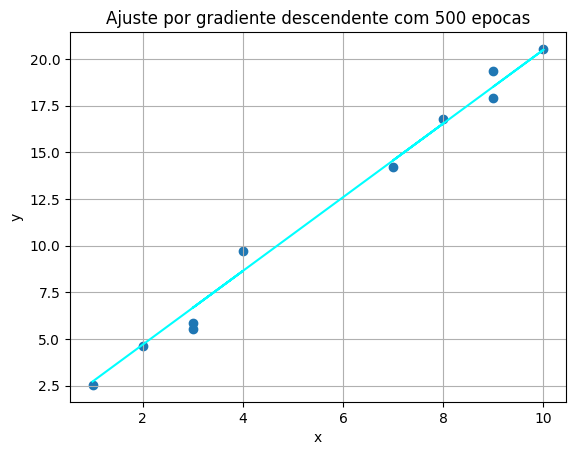

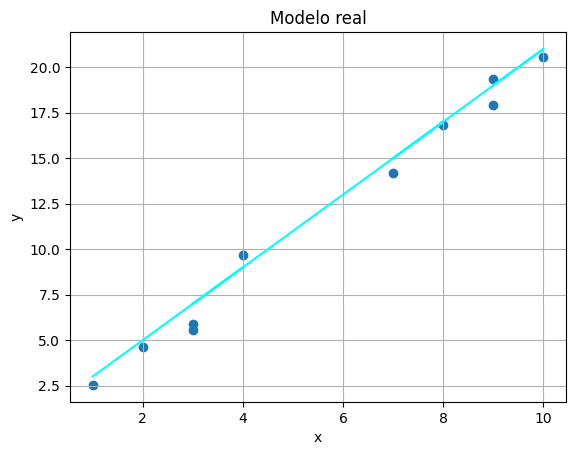

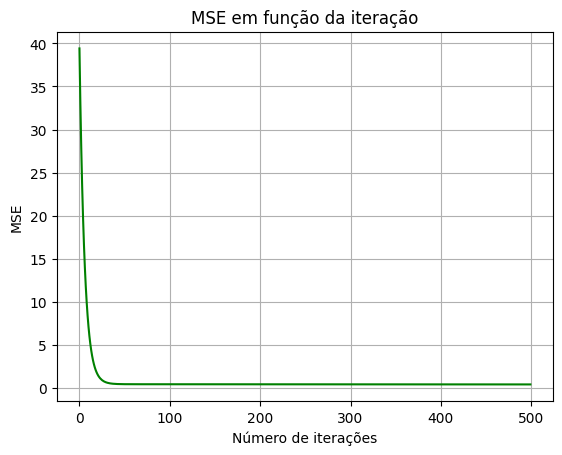

In [ ]:

#Utilização de Gradiente Descendente para tratar dados com ruído
#Gerando os dados
x_vector = np.array([1,2,3,4,3,8,7,9,10,9])
a_real = 2
b_real = 1
std_ruido = 0.9
y_real = modelo_linear(x_vector,a_real,b_real)
y_vector = a_real*x_vector + b_real + np.random.normal(0,std_ruido,len(x_vector))


num_epocas = 500
L,MSE = descent_Grad_1d(x_vector,y_vector,0.001,num_epocas)
print(L)

y_model_grad = modelo_linear(x_vector,L[0],L[1])

#Plotando os dados para comparação
plot_with_scatter("x","y",f"Ajuste por gradiente descendente com {num_epocas} epocas","cyan",y_model_grad,y_vector,x_vector)
plot_with_scatter("x","y",f"Modelo real","cyan",y_real,y_vector,x_vector)
plot_completo("Número de iterações","MSE","MSE em função da iteração","green",MSE)



#**Gradiente descendente multidimensional**
A extensão do modelo linear para multiplas dimensões permite mapear pontos experimentais de um certo experimento físico, através de um modelo, nesse caso linear.
Considere agora o seguinte problema onde temos várias entradas $x_{ij}$  em um sistema, e também os pontos de saída $y_i$, então

$$
(x_{11},x_{12},x_{13},x_{14},...,x_{1M}) \rightarrow y_1
$$

$$
y_i = \sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ
$$

onde $w_j$ são os pesos de cada variável e o termo $\theta$ é conhecido como bias.

e queremos obter um modelo linear para $y_i$ em função das M variáveis do problema

$$
f(x_{i1},x_{i2},...,x_{iM}) = y_i
$$

Utilizando como função de custo o erro médio quadrático mais uma vez, temos

$$
MSE = \frac{ \sum_{i = 0}^{N}(y_i - f(x_{i1},x_{i2},...,x_{iM}))^2}{N}
$$

porém o modelo depende mesmo é dos pesos e do bias, sendo assim, uma vez que os dados são fixos, podemos alterar a dependência da função para os parâmetros de peso e bias

$$
J(w_1,w_2,w_3,...,w_M) = \frac{ \sum_{i = 0}^{N}(y_i - f(\theta,w_1,w_2,w_3,...,w_M))^2}{N}
$$

para obter a minimização do erro e ajustar os parâmetros do modelo, ao mesmo tempo, achamos o seu gradiente em relação aos parâmetros do modelo

$$
∇J(w_1,w_2,w_3,...,w_M) = ∇\frac{ \sum_{i = 0}^{N}(y_i - f(\theta,w_1,w_2,w_3,...,w_M))^2}{N}
$$

e os parâmetros podem ser estimados iterativamente, como segue pela equação abaixo

$$
\begin{cases}
  w_i^{k+1} = w_i^{k} - μ∇J_{w_i} \\
  \theta^{k+1} = \theta^{k} - μ∇J_{\theta}
\end{cases}
$$



Onde k é a $k$-ésima iteração e i é o $i$-ésimo peso.

O sinal de $-$ significa um problema de minimização de uma função de custo, e essa equação pode ser enxergada como um aprendizado supervisionado de um parâmetro de um certo modelo, de acordo com a $k$-ésima época(ou geração) de evolução do algorítmo.


##**Problema de Regressão Linear com M variáveis**
Para um problema de regressão linear multivariável, precisamos do modelo que melhor ajuste a equação do $ℜ^n$ dada por $$\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ$$ , e precisamos dos melhores parâmetros $\vec{w}$ e $\theta$ que faça o ajuste.
Para o caso multidimensional, a maximização é feita calculando o gradiente em relação a cada um dos pesos, e ao bias, como segue

$$
J = \frac{ \sum_{i = 0}^{N}(y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ) )^2}{N}
$$

Calculando o gradiente em relação a um k-ésimo coeficiente

$$
∇J_{w_k} = \frac{\partial }{\partial w_k}\frac{ \sum_{i = 0}^{N}(y_i - (\sum_{j = 1}^{M} w_j \cdot x_{ij}  + θ))^2}{N}
$$

Utilizando que a derivada da soma é a soma das derivadas, temos

$$
∇J_{w_k} = \frac{1}{N} \cdot \sum_{i = 0}^{N} \frac{\partial }{\partial w_k}(y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ))^2
$$

E agora utilizando a regra da cadeia

$$
∇J_{w_k} = \frac{1}{N} \cdot \sum_{i = 0}^{N} 2\cdot (y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ)) \cdot (-\frac{\partial }{\partial w_k} (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ))
$$

Então agora calculando a derivada do modelo com respeito à um $k$-ésimo coeficiente, temos

$$
\nabla J_{w_k} = -\frac{1}{N} \cdot \sum_{i = 0}^{N} 2\cdot (y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ)) \cdot \frac{\partial }{\partial w_k} (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ)
$$

e temos que

$$
\frac{\partial }{\partial w_k} (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ) = x_{ik}
$$

então finalmente obtemos

$$
\nabla J_{w_k} = -\frac{2}{N} \cdot \sum_{i = 0}^{N} x_{ik}(y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ))
$$

e em relação ao bias temos algo similar

$$
∇J_{\theta} = \frac{\partial }{\partial \theta}\frac{ \sum_{i = 0}^{N}(y_i - (\sum_{j = 1}^{M} w_j \cdot x_{ij}  + θ))^2}{N}
$$

desenvolvendo, temos

$$
\nabla J_{\theta} = -\frac{2}{N} \cdot \sum_{i = 0}^{N} (y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ)) \cdot \frac{\partial }{\partial \theta} (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ) = -\frac{2}{N} \cdot \sum_{i = 0}^{N} (y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ))
$$


finalmente temos as equações do gradiente

$$
\begin{cases}
\nabla J_{w_k} =-\frac{2}{N} \cdot \sum_{i = 0}^{N} x_{ik}(y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ)) \\
\nabla J_{\theta} = -\frac{2}{N} \cdot \sum_{i = 0}^{N} (y_i - (\sum_{j = 1}^{M}w_j \cdot x_{ij}  + θ))
\end{cases}
$$

Agora montando o algorítmo da rede neural, ficamos com
$$
\begin{cases}
\ w_k^{n+1} = w_k^{n} - μ\nabla J_{w_k} \\
\ \theta^{n+1} = \theta^{n} - μ\nabla J_{\theta}
\end{cases}
$$





[[ 1  2  3  4  3  8  7  9 10  9]
 [ 1  2  3  4  3  8  7  9 10  9]]
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [ 3  3]
 [ 8  8]
 [ 7  7]
 [ 9  9]
 [10 10]
 [ 9  9]]
[1.26396099 0.71745563]
1.1867614160558804


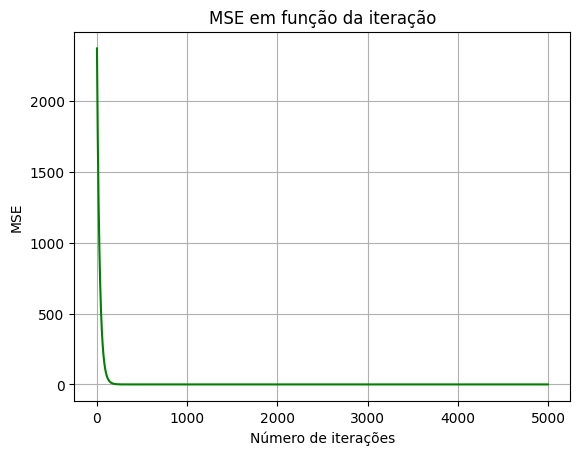

In [ ]:


#Matriz com 10 pontos de duas amostras
M_x = np.array([[1,2,3,4,3,8,7,9,10,9],[1,2,3,4,3,8,7,9,10,9]])
print(M_x)
M_x = M_x.T
print(M_x)
x1 = M_x[:,0]
x2 = M_x[:,1]
a = 1
b = 1
c = 1
y_real = a*x1 + b*x2 + c
y_real = modelo(M_x,np.array([a,b]),c)
y = y_real + np.random.normal(0,0.1,len(x1))

num_epocas = 5000
w,theta,MSE = descent_Grad(M_x,y,1e-4,num_epocas)
y_gradiente = modelo(M_x,w,theta)
print(w)
print(theta)

X1,X2 = np.meshgrid(x1,x2)
plot_completo("Número de iterações","MSE","MSE em função da iteração","green",MSE)


